In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans 

# Create data:
from qtn_sim import *

In [2]:
def getEntropy(statevector):
    return 0

def getMPSEntropy(mps):
    total_entropy = 0
    for bond in range(len(mps) - 1):
        tensor = mps[bond]
        shape = tensor.shape
        matrix = tensor.reshape(shape[0] * shape[1], -1)
        _, S, _ = np.linalg.svd(matrix, full_matrices=False)
        probabilities = S**2
        probabilities /= np.sum(probabilities)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-12))
        total_entropy += entropy
    return total_entropy


In [3]:
numberOfQubits = 20
maxCircuitDepth = 200
numberOfCircuits = 2500
bd = 10
filePath = "circuits.json"

In [4]:
# Create data
circuitsCreated = createCircuits(numberOfCircuits, numberOfQubits, maxCircuitDepth, filePath)


KeyboardInterrupt: 

In [5]:
# Read data
circuitsRead = readCircuits(filePath)

FileNotFoundError: [Errno 2] No such file or directory: 'circuits.json'

In [6]:
# GET THE DATA
entropy = []
circuitEmbeddings = []

circuitsRead = [GHZCircuit(numberOfQubits), QFTCircuit(numberOfQubits)] + circuitsRead

circuitIndex = 0

for circuit in circuitsRead:
    qSimulator = QuantumMPS(numberOfQubits,bd, SequentialOptimiser(swapping=True))
    qSimulator.applyCircuit(circuit)
    entropy.append(getMPSEntropy(qSimulator.tensors))

In [6]:
# SAVE THE DATA
dims = int(100)

In [8]:
from circuitEmbedding import *
circuitEmbeddings = embedCircuits(circuitsRead, dims)

data = [circuitEmbeddings[i].tolist() + [entropy[i]] for i in range(len(circuitEmbeddings))]

data = pd.DataFrame(np.array(data))

data.to_csv('entropy.csv', index=False)

(2502, 512)
[0.17004002 0.26307652 0.29783488 0.32712746 0.35419587 0.3780044
 0.39934982 0.41820355 0.43557214 0.45135456 0.46663575 0.48082785
 0.49442156 0.50735182 0.51931704 0.53055983 0.54137535 0.55139858
 0.5611613  0.57032781 0.57908675 0.58749923 0.59573154 0.60359282
 0.61110385 0.61832095 0.62521902 0.63194011 0.63842642 0.64469504
 0.65078039 0.6564763  0.66207336 0.66744902 0.67260476 0.67762636
 0.68255968 0.6874263  0.69225567 0.69691715 0.70146768 0.70580696
 0.71009541 0.71426298 0.71840728 0.72248671 0.72634483 0.73017422
 0.73398024 0.7376963  0.74134006 0.74493256 0.74845817 0.75190223
 0.75527474 0.75857688 0.76181305 0.76497358 0.76812115 0.77124843
 0.77429776 0.77731514 0.78025874 0.78317524 0.78605888 0.78892358
 0.79170582 0.79446116 0.79710724 0.79971515 0.80230473 0.8048304
 0.80732282 0.8097946  0.81223801 0.81466442 0.81705314 0.8194173
 0.82171706 0.82398013 0.82618824 0.828381   0.83053111 0.8326242
 0.83470702 0.83676617 0.83881581 0.84084073 0.8428377

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aadik\AppData\Local\Temp\ipykernel_1244\184703915.py:2: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('data\data4A\entropy.csv')


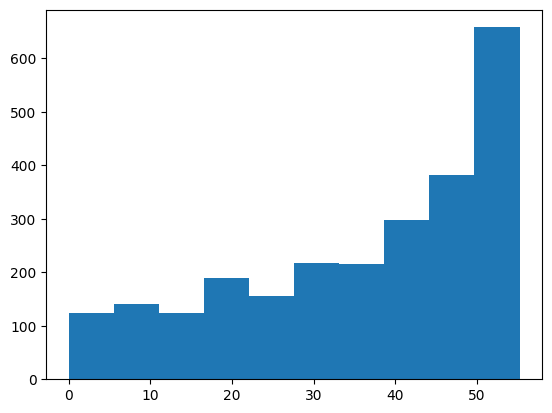

In [9]:
# LOAD THE DATA
data = pd.read_csv('data\data4A\entropy.csv')

# Data distribution

plt.hist(data[str(dims)])
plt.show()

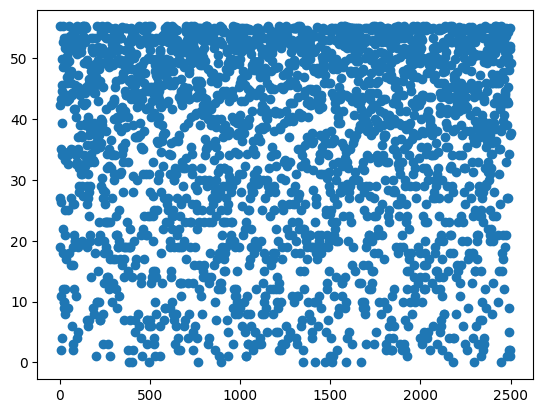

In [10]:
plt.scatter([i for i in range(numberOfCircuits+2)], data[str(dims)])
plt.show()

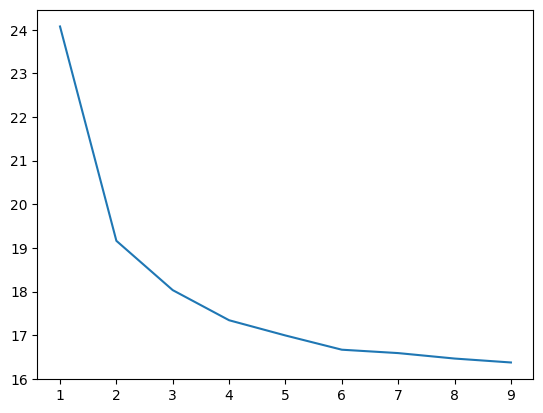

In [11]:
# Choose 3 bins for the entropy, so 3 clusters

# Clustering
X = data[:-2]

# Xs = (X - np.mean(X,axis = 0))/np.std(X, axis = 0)
Xs = X
inertia = []
K = 10
distortions = [] 
for k in range(1,K):
    km = KMeans(n_clusters=k, max_iter=10000)
    km = km.fit(Xs)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(cdist(X,km.cluster_centers_, 'euclidean'),axis=1))/Xs.shape[0])

plt.plot([i for i in range(1,K)], distortions)
plt.show()


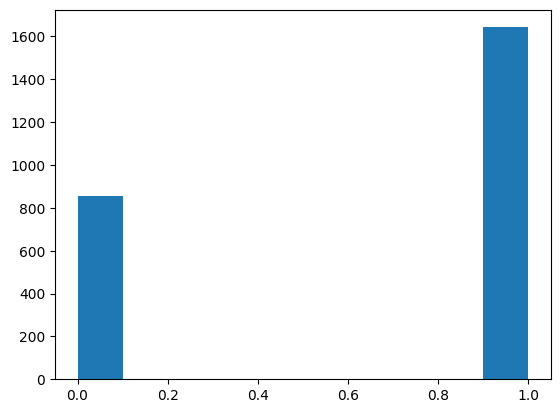

In [12]:
k = 2

km = KMeans(n_clusters=k, max_iter=10000)
km = km.fit(X)


# label = km.predict(data[:-1])



original_labels = km.fit_predict(X)

from collections import Counter
# Count the number of data points in each cluster
cluster_sizes = Counter(original_labels)

# Create a mapping from original labels to new labels
# sorted by cluster size in ascending order
label_mapping = {old_label: new_label for new_label, (old_label, _) 
                 in enumerate(sorted(cluster_sizes.items(), key=lambda x: x[1]))}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in original_labels])


plt.hist(new_labels)

# plt.hist(label)

plt.show()



Gate occurence: Notes.

Sparsity evolution through circuit application.

Bert embedding: space semantically significant?